In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import scipy.cluster.hierarchy as sch

from sklearn.preprocessing import StandardScaler

In [2]:
# Read Data
dataset = pd.read_csv("Mall_Customers.csv")

### Data Understanding

In [3]:
dataset.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataset.shape

(200, 5)

In [6]:
dataset.describe()

CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000

In [7]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
dataset['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In the above figures, we can see that more than 50% of the data set are women and the rest are men.So we say that females are visiting malls more than male.

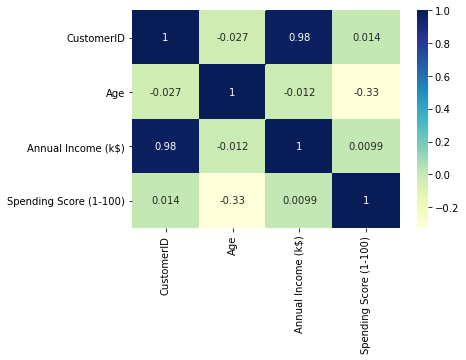

In [9]:
sns.heatmap(dataset.corr(), cmap="YlGnBu", annot = True)
plt.show()

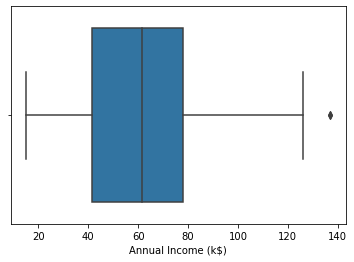

In [10]:
ax = sns.boxplot(x=dataset["Annual Income (k$)"])

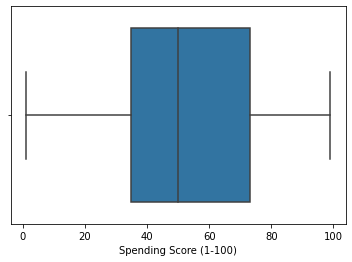

In [11]:
ax = sns.boxplot(x=dataset["Spending Score (1-100)"])

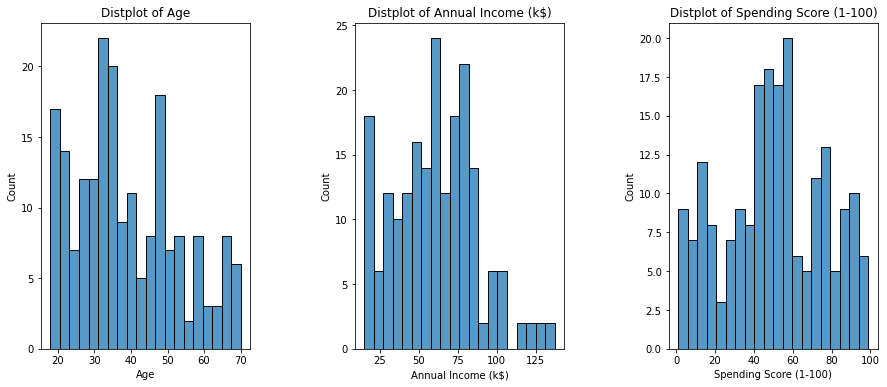

In [12]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(dataset[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

* Ages from 27 to 39 are very much frequent but there is no clear pattern and people at Age 32 are the Most Frequent Visitors in the Mall.
* The average customer's income is about 60k $.
* The highest spending score is about 60.

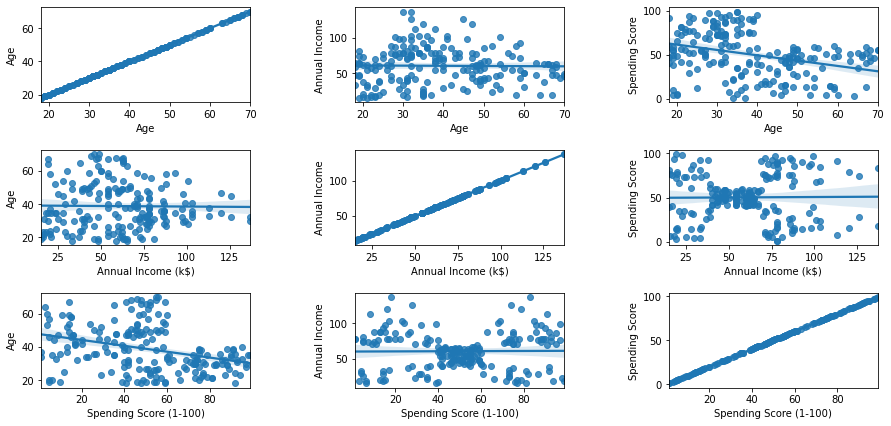

In [13]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = dataset)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [14]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
x=dataset
d1=x[x['Gender']=='Male']
d2=x[x['Gender']=='Female']

col='Spending Score (1-100)'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Male", marker=dict(color="#d62728"),text= dataset['Age'])
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Female", marker=dict(color='rgb(63, 72, 204)'),text= dataset['Age'])
y = [trace1, trace2]
layout={'title':"Spending score [[ Male vs Female ]] with their Age",'xaxis':{'title':"spending acore"}}
fig = go.Figure(data=y, layout=layout)
fig.layout.template='plotly'
iplot(fig)

The spending score of most of the females lies between the 35 and 52 and also there age is in between 18 to 35 years age. In the given dataset the no. of data of female is more than male so we did not exactly find the status of man visiting mall. By viewing these plots we conclude that male did not have much spending score than female because they did not visit mall frequently.

Text(0, 0.5, 'Spending Score')

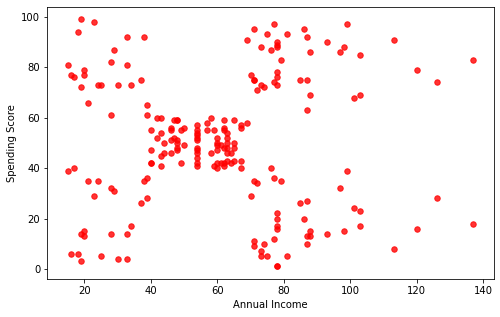

In [15]:
plt.figure(figsize=(8,5))
plt.scatter('Annual Income (k$)','Spending Score (1-100)',data=dataset, s=30, color="red", alpha = 0.8)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

We can see the behaviour of Customers with Annual Income and their Spending Score. The plot shows segments of Customers with following behaviours :

Less Income- Less Spending Score

High Income- Less Spending Score

Low Income- High Spending Score

High Income- High Spending Score

Moderate Income- Moderate Spending Score

### Data Preparation

#### Dropping Unnecessary Columns

In [16]:
#drop country column
df=dataset.drop(['CustomerID','Gender','Age'],axis=1)

In [17]:
df.head()

Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40

As we are going to use Unsupervised learning technique we don't need the customer ID and gender column here.So we are going to drop it

#### Scaling Data

In [18]:
# feature scaling
sc = StandardScaler()
scaled = sc.fit_transform(df)

sc_dataset = pd.DataFrame(scaled,columns=df.columns)
sc_dataset.head()

Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980

### Building Model  - K-Means Clustering

In [19]:
from sklearn.cluster import KMeans

Using Elbow Method to decide the number of cluster.

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



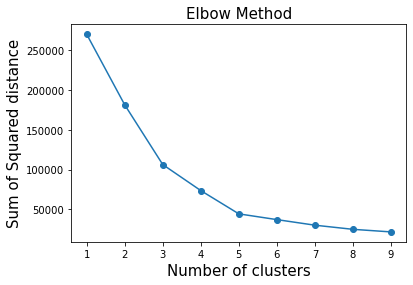

In [20]:
# plot elbow curve

a=[]
K=range(1,10)
for i in K:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df)
    a.append(kmean.inertia_)
    
plt.plot(K,a,marker='o')
plt.title('Elbow Method',fontsize=15)
plt.xlabel('Number of clusters',fontsize=15)
plt.ylabel('Sum of Squared distance',fontsize=15)
plt.show()

From the Elbow Method plot, we can see the elbow or a knee like bend is at 5.
Hence, number of cluster - 5 will be used in implementing K-Means Clustering.

In [21]:
kmeans = KMeans(n_clusters = 5,random_state = 105)
kmeans_model = kmeans.fit(sc_dataset)

In [22]:
y_kmeans = kmeans_model.predict(sc_dataset)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [23]:
#count number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

1    81
2    39
0    35
4    23
3    22
dtype: int64

In [24]:
kmeans_df = pd.DataFrame(dataset)
kmeans_df['KMeans_Clusters'] = y_kmeans
kmeans_df.head()

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   KMeans_Clusters  
0                4  
1                3  
2                4  
3                3  
4                4

### Visualization of clusteres

<function matplotlib.pyplot.show(close=None, block=None)>

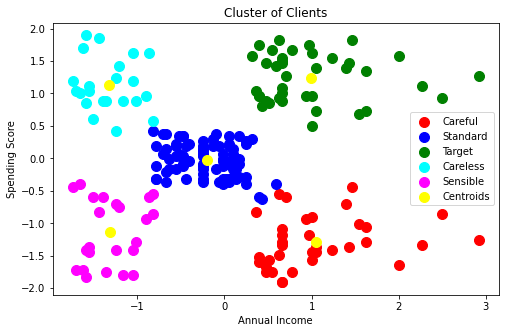

In [25]:
x=sc_dataset.values

plt.figure(figsize=(8,5))

plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=100, c='red', label ='Careful')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=100, c='blue', label ='Standard')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=100, c='green', label ='Target')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=100, c='cyan', label ='Careless')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=100, c='magenta', label ='Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show

From above clusters graph we can conclude that

* 0 = Careful : Earning high but spending less

* 1 = Standard : Average in terms of earning and spending

* 2 = Target : Earning high and also spending high (Target Customer)

* 3 = Careless : Earning less but spending high

* 4 = Sensible : Earning less and spending less

In [26]:
Careful=kmeans_df[kmeans_df['KMeans_Clusters']==0]['CustomerID']
Standard=kmeans_df[kmeans_df['KMeans_Clusters']==1]['CustomerID']
Target=kmeans_df[kmeans_df['KMeans_Clusters']==2]['CustomerID']
Careless=kmeans_df[kmeans_df['KMeans_Clusters']==3]['CustomerID']
Sensible=kmeans_df[kmeans_df['KMeans_Clusters']==4]['CustomerID']


print("Number of Careful: ",len(Careful))
print("Number of Standard: ",len(Standard))
print("Number of Target: ",len(Target))
print("Number of Careless: ",len(Careless))
print("Number of Sensible: ",len(Sensible))

Number of Careful:  35
Number of Standard:  81
Number of Target:  39
Number of Careless:  22
Number of Sensible:  23


### Model Evaluation

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score
labels = kmeans_model.labels_

print('Silhoutte score of K-Means Clustering model is ' + str(silhouette_score(sc_dataset, labels, metric = 'euclidean')))

Silhoutte score of K-Means Clustering model is 0.5546571631111091


### Building Model  - Hierarchical Clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering

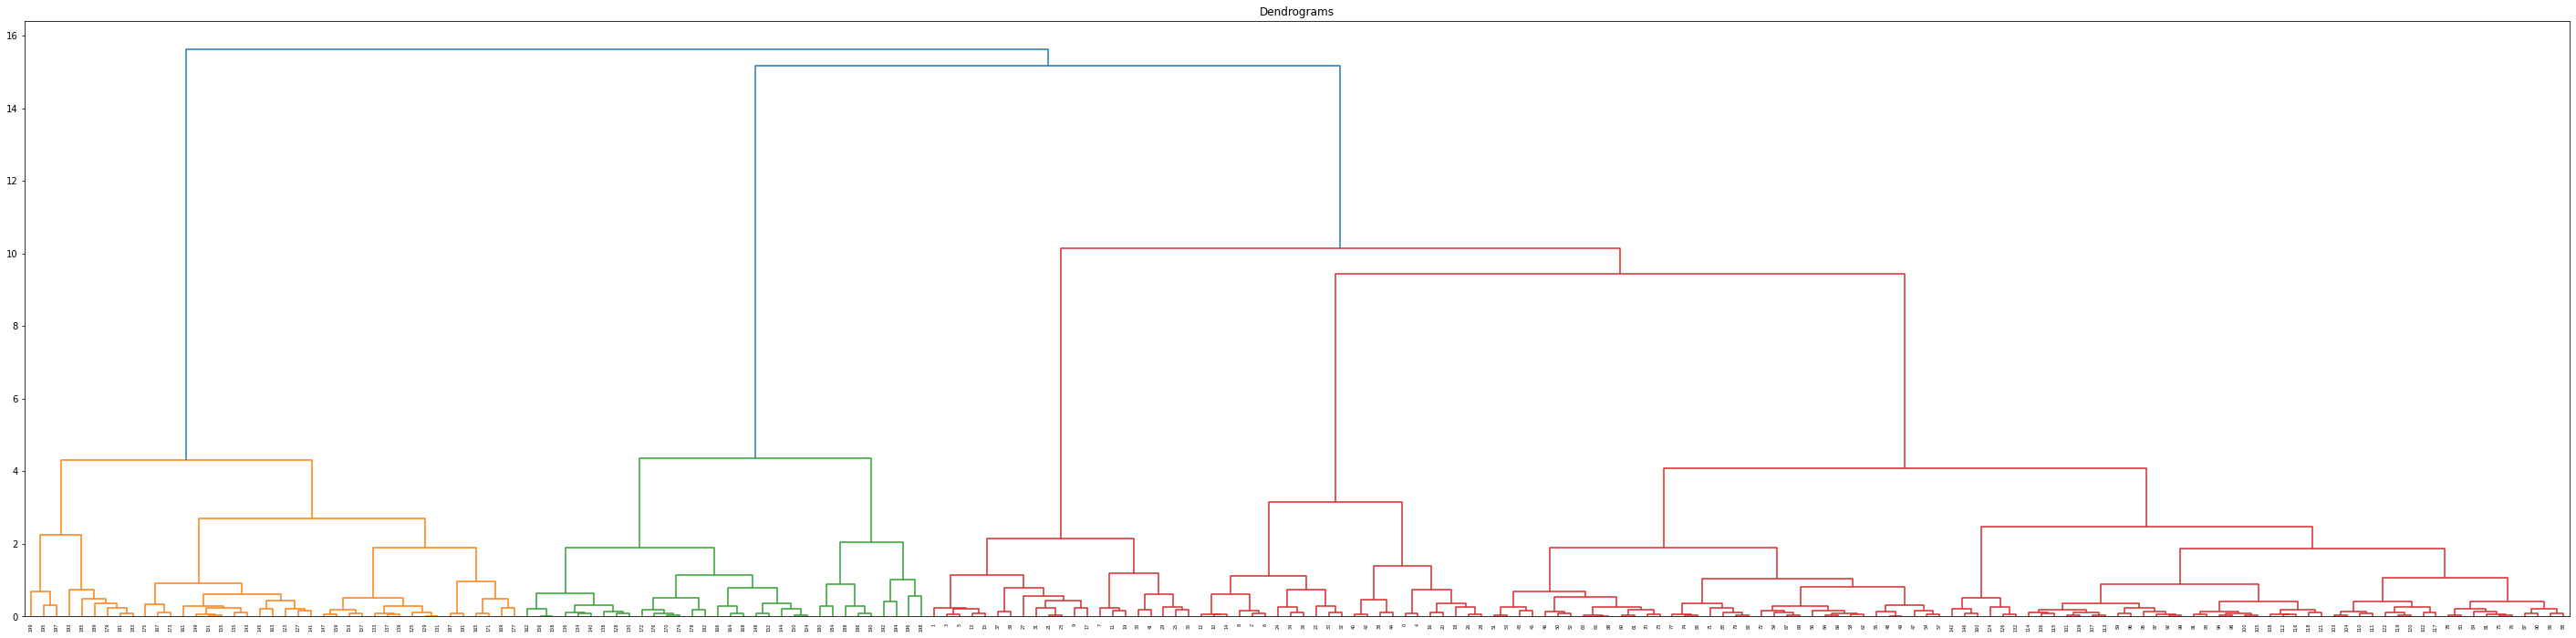

In [29]:
#plotting dendogram
plt.figure(figsize=(50, 12))
plt.title("Dendrograms")
dendrogram=sch.dendrogram(sch.linkage(sc_dataset,method='ward'))

* Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

In [30]:
hc= AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')

In [31]:
y_hc = hc.fit_predict(sc_dataset)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [32]:
#count number of records in every cluster
pd.Series(hc.labels_).value_counts()

2    85
1    39
0    32
4    23
3    21
dtype: int64

In [33]:
hc_df = pd.DataFrame(dataset)
hc_df['hc_Clusters'] = y_hc
hc_df

CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     KMeans_Clusters  hc_Clusters  
0                  4            4  
1                  3            3  
2                  4            4  
3                  3            3  
4                  4            4  
..               ...          ...  
195                2            1  
196                0            0  
197                2            1  
198                0            0  
199                2            1  

[200 rows x 7 columns]

### Visualization of hcluster

<function matplotlib.pyplot.show(close=None, block=None)>

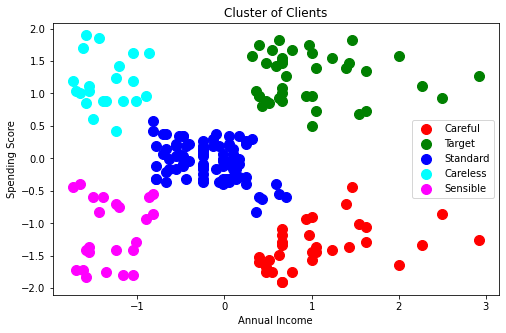

In [34]:
x=sc_dataset.values

plt.figure(figsize=(8,5))

plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], s=100, c='red', label ='Careful')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], s=100, c='green', label ='Target')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], s=100, c='blue', label ='Standard')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], s=100, c='cyan', label ='Careless')
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 1], s=100, c='magenta', label ='Sensible')

plt.title('Cluster of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show

From above clusters graph we can conclude that

* 0 = Careful : Earning high but spending less

* 1 = Target : Earning high and also spending high (Target Customer)

* 2 = Standard : Average in terms of earning and spending

* 3 = Careless : Earning less but spending high

* 4 = Sensible : Earning less and spending less

In [35]:
Careful=hc_df[hc_df['hc_Clusters']==0]['CustomerID']
Target=hc_df[hc_df['hc_Clusters']==1]['CustomerID']
Standard=hc_df[hc_df['hc_Clusters']==2]['CustomerID']
Careless=hc_df[hc_df['hc_Clusters']==3]['CustomerID']
Sensible=hc_df[hc_df['hc_Clusters']==4]['CustomerID']


print("Number of Careful: ",len(Careful))
print("Number of Standard: ",len(Standard))
print("Number of Target: ",len(Target))
print("Number of Careless: ",len(Careless))
print("Number of Sensible: ",len(Sensible))

Number of Careful:  32
Number of Standard:  85
Number of Target:  39
Number of Careless:  21
Number of Sensible:  23
